# Analisi degli annunci di AirBnb nella città di Milano

In [1]:
# import librerie, moduli utilizzati e funzioni create
from utils import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ivano\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# import dataframe annunci appartamenti AirBnb Milano from http://insideairbnb.com/get-the-data/
filename = '/Users/ivano/Documents/listings.csv'
df_listings = read_csv_file(filename)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20370 non-null  int64  
 1   listing_url                                   20370 non-null  object 
 2   scrape_id                                     20370 non-null  int64  
 3   last_scraped                                  20370 non-null  object 
 4   source                                        20370 non-null  object 
 5   name                                          20363 non-null  object 
 6   description                                   19991 non-null  object 
 7   neighborhood_overview                         11182 non-null  object 
 8   picture_url                                   20370 non-null  object 
 9   host_id                                       20370 non-null 

In [3]:
# definizione lista colonne da eliminare
list_elim = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url','host_name',
             'host_location','host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','host_listings_count',
             'host_total_listings_count','neighbourhood','neighbourhood_group_cleansed','bathrooms',
             'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
             'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated','has_availability', 
             'calendar_last_scraped', 'number_of_reviews_ltm','number_of_reviews_l30d','license' ]

In [4]:
# eliminazione colonne
df_smart = delete_col(df_listings, list_elim)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20370 non-null  int64  
 1   name                                          20363 non-null  object 
 2   description                                   19991 non-null  object 
 3   neighborhood_overview                         11182 non-null  object 
 4   host_id                                       20370 non-null  int64  
 5   host_since                                    20370 non-null  object 
 6   host_about                                    10948 non-null  object 
 7   host_response_time                            15273 non-null  object 
 8   host_response_rate                            15273 non-null  object 
 9   host_acceptance_rate                          16552 non-null 

In [5]:
# definizione colonne e type da cambiare
type_col = {'description': str,
            'name': str,
            'neighborhood_overview': str,
            'host_about': str,
            'id': str,
            'host_id': str,
            'property_type': 'category',
            'room_type': 'category',
            'neighbourhood_cleansed': 'category',
            'host_response_time': 'category',
            'host_response_rate': float,
            'host_acceptance_rate': float,
            'price': float,
            'bathrooms_text': float,
            'amenities': list,
            'host_verifications': list,
            'host_since': 'datetime64',
            'first_review': 'datetime64',
            'last_review': 'datetime64',
            'host_is_superhost': bool,
            'host_has_profile_pic': bool,
            'host_identity_verified': bool,
            'instant_bookable': bool}

In [6]:
df_smart = change_type(df_smart, type_col)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            20370 non-null  object        
 1   name                                          20370 non-null  object        
 2   description                                   20370 non-null  object        
 3   neighborhood_overview                         20370 non-null  object        
 4   host_id                                       20370 non-null  object        
 5   host_since                                    20370 non-null  datetime64[ns]
 6   host_about                                    20370 non-null  object        
 7   host_response_time                            15273 non-null  category      
 8   host_response_rate                            15273 non-null  floa

In [7]:
# definzione colonne in cui contare il numero di caratteri o la durata
cols = ['name', 'description', 'neighborhood_overview', 'host_about', 'amenities', 'host_verifications', 'first_review', 'last_review', 'host_since']

In [8]:
# creazione nuove colonne contatori
df_smart = add_counts_col(df_smart, cols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            20370 non-null  object        
 1   name                                          20370 non-null  object        
 2   description                                   20370 non-null  object        
 3   neighborhood_overview                         20370 non-null  object        
 4   host_id                                       20370 non-null  object        
 5   host_since                                    20370 non-null  datetime64[ns]
 6   host_about                                    20370 non-null  object        
 7   host_response_time                            15273 non-null  category      
 8   host_response_rate                            15273 non-null  floa

In [9]:
# rimozione outliner a livello di prezzo
df_smart = remove_outliers(df_smart, 'price')

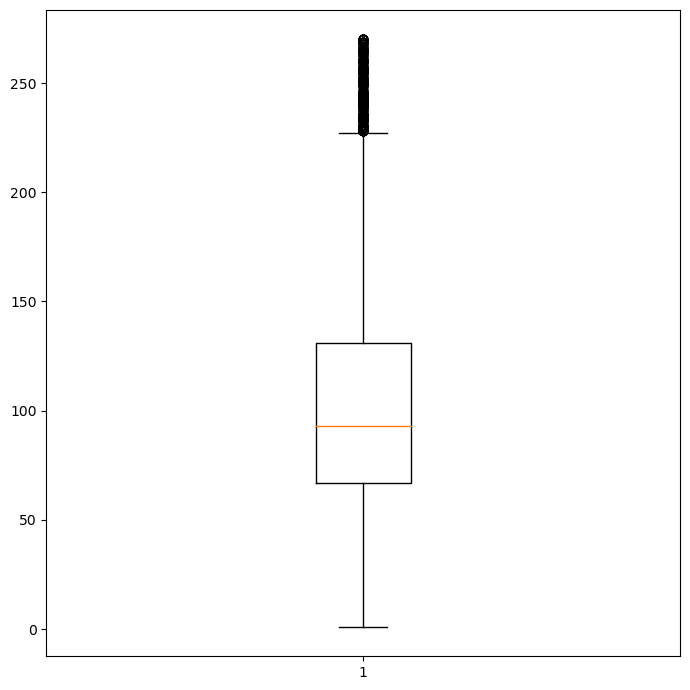

In [10]:
fig,ax = plt.subplots(figsize=(7,7), ncols=1)
ax.boxplot(df_smart['price'])
plt.tight_layout()
plt.show()

In [11]:
# definizione del criterio di successo
success_criteria = {"number_of_reviews": (">", 50), "availability_30":("<=", 5)}

In [12]:
# divisione dataframe in successo e insuccesso
success_df, not_success_df = split_df(df_smart, success_criteria)

In [13]:
# ricerca feature significative fra i due dataframe
significative = find_significant(success_df, not_success_df)
significative

,Column,P-Value,DF1 Mean,DF2 Mean,DF1 Frequency,DF2 Frequency,DF1 Best,DF2 Best
0,longitude,2.106931e-02,9.189291,9.187682,NaN,NaN,None,None
1,accommodates,1.211440e-06,3.110809,2.923982,NaN,NaN,None,None
2,price,7.458342e-48,87.273283,106.258334,NaN,NaN,None,None
3,minimum_nights,2.180126e-02,3.842284,4.979582,NaN,NaN,None,None
4,availability_30,0.000000e+00,1.558124,9.724478,NaN,NaN,None,None
5,availability_60,0.000000e+00,5.605710,21.948495,NaN,NaN,None,None
6,availability_90,0.000000e+00,11.430999,36.277310,NaN,NaN,None,None
7,availability_365,4.494449e-113,83.419443,144.635656,NaN,NaN,None,None
8,number_of_reviews,1.884569e-238,162.104691,20.437363,NaN,NaN,None,None
9,calculated_host_listings_count,8.247116e-100,8.214140,25.646614,NaN,NaN,None,None


In [14]:
# analisi statistiche su diverse feature
dfs = {'description': {}, 'name': {}, 'amenities': {}, 'neighborhood_overview': {}}

for col in dfs.keys():
    dfs[col] = golden_word(success_df, not_success_df, col)

In [15]:
dfs['description'][:20]

,word,p_value,freq_ratio
0,central,9.410594e-41,2.079478
1,meters,1.150674e-38,2.331233
2,check,1.644201e-37,2.873837
3,station,7.673054e-27,1.687883
4,luggages,6.898013e-25,44.935352
5,keypad,1.070632e-23,20.461633
6,numeric,6.947466e-20,25.035410
7,people,9.364163e-20,1.754437
8,old,1.835680e-19,2.370216
9,receive,2.767054e-19,3.823281


In [16]:
dfs['name'][:20]

,word,p_value,freq_ratio
0,central,2.715346e-24,2.717043
1,station,5.328936e-17,2.979152
2,duomo,4.790466e-15,2.091848
3,primopiano,1.336958e-13,5.098649
4,heart,5.655712e-13,2.483260
5,studio,2.235337e-08,1.736791
6,cheap,3.540940e-08,10.037965
7,livings,1.222348e-07,22.943920
8,naviglis,1.507207e-07,14.339950
9,marta,8.095925e-07,34.415879


In [17]:
dfs['amenities'][:20]

,word,p_value,freq_ratio
0,Paid parking off premises,4.529315e-58,2.511799
1,Carbon monoxide alarm,2.963652e-51,2.016885
2,Smoke alarm,4.479167e-45,1.913834
3,Pack ’n play/Travel crib,1.924022e-26,2.336736
4,Children’s books and toys,6.331433e-25,2.622931
5,Crib,8.218070e-21,1.906188
6,High chair,2.969290e-15,1.998633
7,Lockbox,2.090206e-13,1.653720
8,Building staff,9.130716e-10,2.099522
9,Children’s dinnerware,4.325795e-09,1.944045


In [18]:
dfs['neighborhood_overview'][:20]

,word,p_value,freq_ratio
0,cathedral,1.801809e-27,3.714813
1,square,2.636350e-27,3.117034
2,decorated,6.431420e-25,62.201523
3,arranged,3.650990e-23,107.815973
4,considering,3.918155e-23,58.054755
5,shape,1.633403e-21,38.703170
6,cat,2.342291e-21,99.522437
7,perspective,2.370323e-21,53.907987
8,closes,2.370323e-21,53.907987
9,equestrian,2.370323e-21,53.907987


# Analisi posizione geografica degli appartamenti

In [19]:
# import dataframe coordinate fermate metro Milano from http://www.datiopen.it/it/opendata/Comune_di_Milano_Fermate_della_metropolitana
df_metro = pd.read_json(r'C:/Users/ivano/documenti/metromilano.json')
df_metro

,ID,FERMATA,N_ARCHI,DO_Y,DO_X
0,2,GESSATE,1,45.546128,9.437564
1,4,ZARA,2,45.492662,9.192703
2,5,S.DONATO,1,45.430214,9.256324
3,6,MACIACHINI,2,45.497771,9.184904
4,8,MOLINO DORINO,2,45.505079,9.093327
...,...,...,...,...,...
88,98,COMASINA,2,45.531556,9.161898
89,99,AFFORI NORD,2,45.522379,9.167983
90,100,AFFORI CENTRO,2,45.512880,9.174410
91,101,DERGANO,2,45.505225,9.179710


In [20]:
# preparazione dataframe con coordinate per gli appartamenti di successo

geo_success = success_df[['id', 'latitude', 'longitude']] # necessarie solo colonne ID, latitudine e longitudine
geo_success.reset_index(inplace=True)                     # si reimposta l'indice dataframe ordinato partendo da 0
geo_success.drop(['index'], axis=1, inplace=True)         # per permettere successivamente i cicli for

C:\Users\ivano\AppData\Local\Temp\ipykernel_8320\4036306335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_success.drop(['index'], axis=1, inplace=True)         # per permettere successivamente i cicli for


In [21]:
geo_success

,id,latitude,longitude
0,5625937,45.46001,9.18582
1,206450,45.45238,9.20745
2,2759420,45.48264,9.18543
3,24224061,45.46722,9.17246
4,34704076,45.46243,9.12601
...,...,...,...
1466,32807147,45.47894,9.17549
1467,3816798,45.47167,9.23089
1468,17899097,45.46499,9.22995
1469,3725671,45.47641,9.18230


In [22]:
# preparazione dataframe con coordinate per gli appartamenti di insuccesso

geo_not_success = not_success_df[['id', 'latitude', 'longitude']] # necessarie solo colonne ID, latitudine e longitudine
geo_not_success.reset_index(inplace=True)                         # si reimposta l'indice dataframe ordinato partendo da 0
geo_not_success.drop(['index'], axis=1, inplace=True)             # per permettere successivamente i cicli for

C:\Users\ivano\AppData\Local\Temp\ipykernel_8320\2043158464.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_not_success.drop(['index'], axis=1, inplace=True)             # per permettere successivamente i cicli for


In [23]:
geo_not_success

,id,latitude,longitude
0,5678774,45.452340,9.174740
1,6139798,45.512520,9.130460
2,7479570,45.456200,9.201310
3,8438872,45.495470,9.207160
4,10609449,45.448450,9.181160
...,...,...,...
17333,833934291490970238,45.456288,9.177388
17334,637425034363201358,45.457314,9.180191
17335,40817739,45.458340,9.179450
17336,592550481216316403,45.492150,9.193410


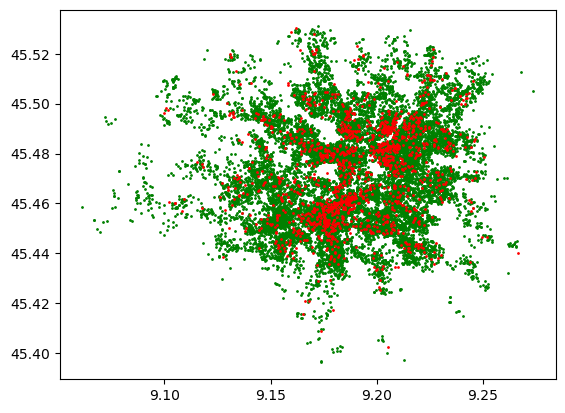

In [24]:
# visualizzazione appartamenti di successo e di insuccesso sulla mappa di Milano
# VERDI: insuccesso, ROSSI: successo

plt.scatter(geo_not_success['longitude'],geo_not_success['latitude'], s = 1, c = 'green')
plt.scatter(geo_success['longitude'],geo_success['latitude'], s = 1, c = 'red')

In [25]:
# preparazione dataframe fermate metropolitana Milano:
# rinominazione colonne, ordinamento indici e eliminazione righe con longitudine 
# maggiore di 9.27° EST in quanto al di fuori della zona principale di Milano

df_metro.rename(columns={'DO_Y':'latitude', 'DO_X':'longitude'}, inplace=True)  
geo_metro = df_metro.drop(['ID', 'N_ARCHI'], axis=1)
geo_metro = geo_metro[geo_metro['longitude'] < 9.27]
geo_metro.reset_index(inplace=True)
geo_metro.drop(['index'], axis=1, inplace=True) 

In [26]:
geo_metro

,FERMATA,latitude,longitude
0,ZARA,45.492662,9.192703
1,S.DONATO,45.430214,9.256324
2,MACIACHINI,45.497771,9.184904
3,MOLINO DORINO,45.505079,9.093327
4,BISCEGLIE,45.455368,9.112897
...,...,...,...
75,COMASINA,45.531556,9.161898
76,AFFORI NORD,45.522379,9.167983
77,AFFORI CENTRO,45.512880,9.174410
78,DERGANO,45.505225,9.179710


In [27]:
# costruzione dataframe con coordinate di alcuni luoghi chiave di Milano:
# Duomo, Porta Romana, Sempione, San Siro e stazione centrale

data = {'luogo': ['Duomo', 'Porta Romana', 'Sempione', 'San Siro', 'stazione centrale'],
    'latitude': [45.464211, 45.45226, 45.47569, 45.47695, 45.485658],
    'longitude': [9.191383, 9.202053, 9.172361, 9.12469, 9.203988]}

geo_key = pd.DataFrame(data)

In [28]:
geo_key

,luogo,latitude,longitude
0,Duomo,45.464211,9.191383
1,Porta Romana,45.452260,9.202053
2,Sempione,45.475690,9.172361
3,San Siro,45.476950,9.124690
4,stazione centrale,45.485658,9.203988


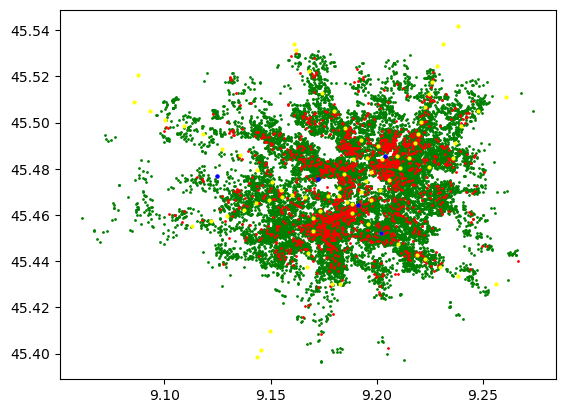

In [29]:
# visualizzazione appartamenti di successo e di insuccesso sulla mappa di Milano
# insieme alle fermate della metropolitana e i luoghi chiave 
# VERDI: insuccesso, ROSSI: successo, GIALLI: fermate metro, BLU: luoghi chiave

plt.scatter(geo_not_success['longitude'],geo_not_success['latitude'], s = 1, c = 'green')
plt.scatter(geo_success['longitude'],geo_success['latitude'], s = 1, c = 'red')
plt.scatter(geo_metro['longitude'],geo_metro['latitude'], s = 4, c = 'yellow')
plt.scatter(geo_key['longitude'],geo_key['latitude'], s = 5, c = 'blue')

In [30]:
#tempo di esecuzione circa 45 secondi

#calcolo della distanza minima dalla fermata più vicina per ogni appartamento di successo,
#attraverso un doppio ciclo for, con la condizione if per decretare a ogni ciclo interno
#la nuova distanza se trovata.

#restituisce una lista con la distanza minima per ogni appartamento

min_dis_metro_success = []

for i in range (len(geo_success)):
    min_dis = float('inf')
    for h in range (len(geo_metro)):
        dis = distanza(geo_success.loc[i]['latitude'], geo_success.loc[i]['longitude'],
         geo_metro.loc[h]['latitude'], geo_metro.loc[h]['longitude'])
        if dis < min_dis:
            min_dis = dis
    
    min_dis_metro_success.append(min_dis)

In [32]:
#tempo di esecuzione circa 3 secondi

#calcolo della distanza minima dal luogo chiave più vicino per ogni appartamento di successo

min_dis_key_success = []

for i in range (len(geo_success)):
    min_dis = float('inf')
    for h in range (len(geo_key)):
        dis = distanza(geo_success.loc[i]['latitude'], geo_success.loc[i]['longitude'],
         geo_key.loc[h]['latitude'], geo_key.loc[h]['longitude'])
        if dis < min_dis:
            min_dis = dis
    
    min_dis_key_success.append(min_dis)

In [33]:
#tempo di esecuzione circa 5/10 minuti

#calcolo della distanza minima dalla fermata più vicina per ogni appartamento di non successo

min_dis_metro_not_success = []

for i in range (len(geo_not_success)):
    min_dis = float('inf')
    for h in range (len(geo_metro)):
        dis = distanza(geo_not_success.loc[i]['latitude'], geo_not_success.loc[i]['longitude'],
         geo_metro.loc[h]['latitude'], geo_metro.loc[h]['longitude'])
        if dis < min_dis:
            min_dis = dis
    
    min_dis_metro_not_success.append(min_dis)

In [34]:
#tempo di esecuzione circa 45 secondi

#calcolo della distanza minima dal luogo chiave più vicino per ogni appartamento di successo

min_dis_key_not_success = []

for i in range (len(geo_not_success)):
    min_dis = float('inf')
    for h in range (len(geo_key)):
        dis = distanza(geo_not_success.loc[i]['latitude'], geo_not_success.loc[i]['longitude'],
         geo_key.loc[h]['latitude'], geo_key.loc[h]['longitude'])
        if dis < min_dis:
            min_dis = dis
    
    min_dis_key_not_success.append(min_dis)

In [35]:
print('Distanza media metro/appartamenti insuccesso in metri: ' + str(round(np.mean(min_dis_metro_not_success))))
print('Distanza media metro/appartamenti successo in metri: ' + str(round(np.mean(min_dis_metro_success))))
print('Distanza media luoghi chiave/appartamenti insuccesso in metri: ' + str(round(np.mean(min_dis_key_not_success))))
print('Distanza media luoghi chiave/appartamenti successo in metri: ' + str(round(np.mean(min_dis_key_success))))

Distanza media metro/appartamenti insuccesso in metri: 688.0
Distanza media metro/appartamenti successo in metri: 579.0
Distanza media luoghi chiave/appartamenti insuccesso in metri: 1803.0
Distanza media luoghi chiave/appartamenti successo in metri: 1530.0


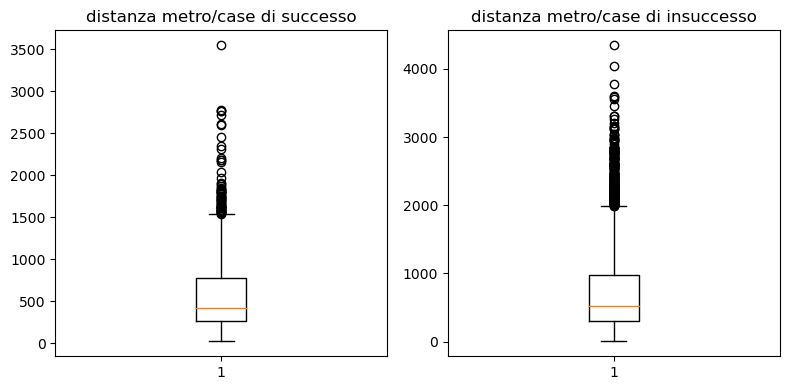

In [36]:
fig, (axs, axu) = plt.subplots(figsize=(8,4), ncols=2)
axs.boxplot(min_dis_metro_success)
axs.set_title("distanza metro/case di successo")
axu.boxplot(min_dis_metro_not_success)
axu.set_title("distanza metro/case di insuccesso")
plt.tight_layout()
plt.show()

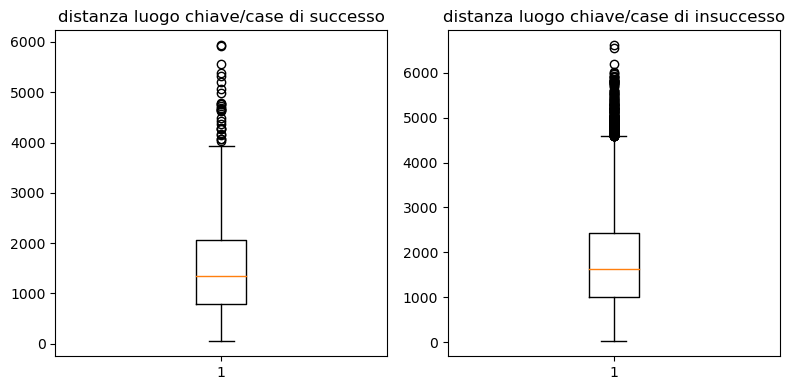

In [37]:
fig, (axsk, axuk) = plt.subplots(figsize=(8,4), ncols=2)
axsk.boxplot(min_dis_key_success)
axsk.set_title("distanza luogo chiave/case di successo")
axuk.boxplot(min_dis_key_not_success)
axuk.set_title("distanza luogo chiave/case di insuccesso")
plt.tight_layout()
plt.show()